In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [2]:
start = '2013-01-01'
end = '2023-12-21'
stock = 'NVDA'

data = yf.download(stock, start, end)

[*********************100%%**********************]  1 of 1 completed


In [4]:
data.reset_index(inplace=True)

In [5]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,0.314000,0.318250,0.312750,0.318000,0.293560,478836000
1,2013-01-03,0.318000,0.321750,0.314500,0.318250,0.293791,298888000
2,2013-01-04,0.318750,0.329750,0.317750,0.328750,0.303484,524968000
3,2013-01-07,0.328500,0.329500,0.317000,0.319250,0.294714,610732000
4,2013-01-08,0.320000,0.321000,0.310000,0.312250,0.288252,466424000
...,...,...,...,...,...,...,...
2757,2023-12-14,48.389999,48.669998,47.422001,48.349998,48.343758,391232000
2758,2023-12-15,48.194000,49.403999,48.119999,48.889999,48.883690,479948000
2759,2023-12-18,49.400002,50.432999,49.150002,50.077000,50.070538,412587000
2760,2023-12-19,49.424000,49.700001,48.895000,49.604000,49.597599,464444000


In [6]:
ma_100_days = data.Close.rolling(100).mean()

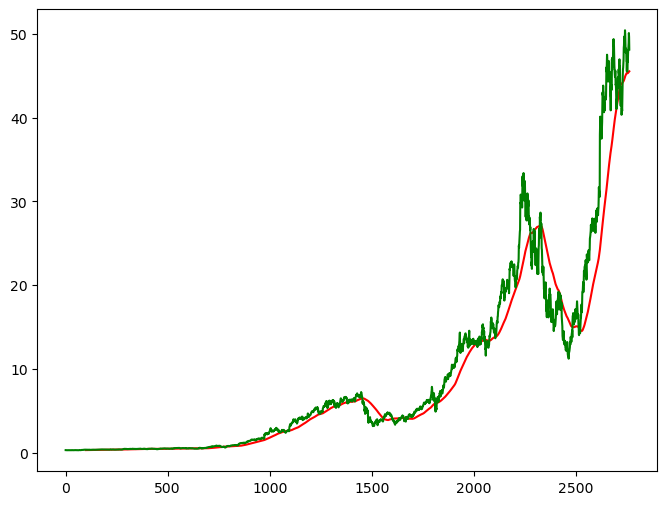

In [7]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(data.Close, 'g')
plt.show()

In [8]:
ma_200_days = data.Close.rolling(200).mean()

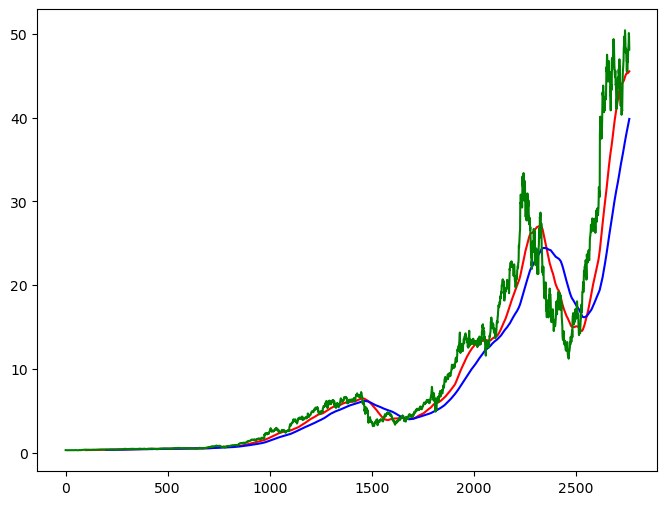

In [9]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(ma_200_days, 'b')
plt.plot(data.Close, 'g')
plt.show()

In [10]:
data.dropna(inplace=True)

In [18]:
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])

In [19]:
data_train.shape[0]

2209

In [20]:
data_test.shape[0]

553

In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [30]:
data_train_scale = scaler.fit_transform(data_train)

In [31]:
x = []
y = []

for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])


In [32]:
x, y = np.array(x), np.array(y)

In [33]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [38]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
              input_shape = ((x.shape[1],1))))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

In [41]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [40]:
model.fit(x,y, epochs = 50, batch_size = 32, verbose =1)

Epoch 1/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 14s 107ms/step - loss: 0.0443
Epoch 2/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 7s 113ms/step - loss: 0.0041
Epoch 3/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 7s 104ms/step - loss: 0.0035
Epoch 4/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 7s 99ms/step - loss: 0.0034
Epoch 5/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 7s 100ms/step - loss: 0.0037
Epoch 6/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 8s 119ms/step - loss: 0.0024
Epoch 7/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 7s 103ms/step - loss: 0.0028
Epoch 8/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 7s 104ms/step - loss: 0.0027
Epoch 9/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 7s 105ms/step - loss: 0.0027
Epoch 10/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 7s 102ms/step - loss: 0.0026
Epoch 11/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 7s 102ms/step - loss: 0.0025
Epoch 12/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 7s 100ms/step - loss: 0.0026
Epoch 13/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 7s 103ms/step - loss: 0.0028
Epoch 14/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 7s 102ms/step - loss: 0.0021
Epoch 15/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 7s 104ms/step - lo

In [42]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_12 (LSTM)                  │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_13 (LSTM)                  │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_14 (LSTM)                  │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_15 (LSTM)                  │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [44]:
pas_100_days = data_train.tail(100)

In [45]:
data_test = pd.concat([pas_100_days, data_test], ignore_index=True)

In [48]:
data_test_scale = scaler.fit_transform(data_test)

In [49]:
x = []
y = []

for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])


In [50]:
x, y = np.array(x), np.array(y)

In [51]:
y_predict = model.predict(x)

18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 81ms/step


In [55]:
scale = 1/scaler.scale_

In [56]:
y_predict = y_predict*scale

In [57]:
y = y*scale

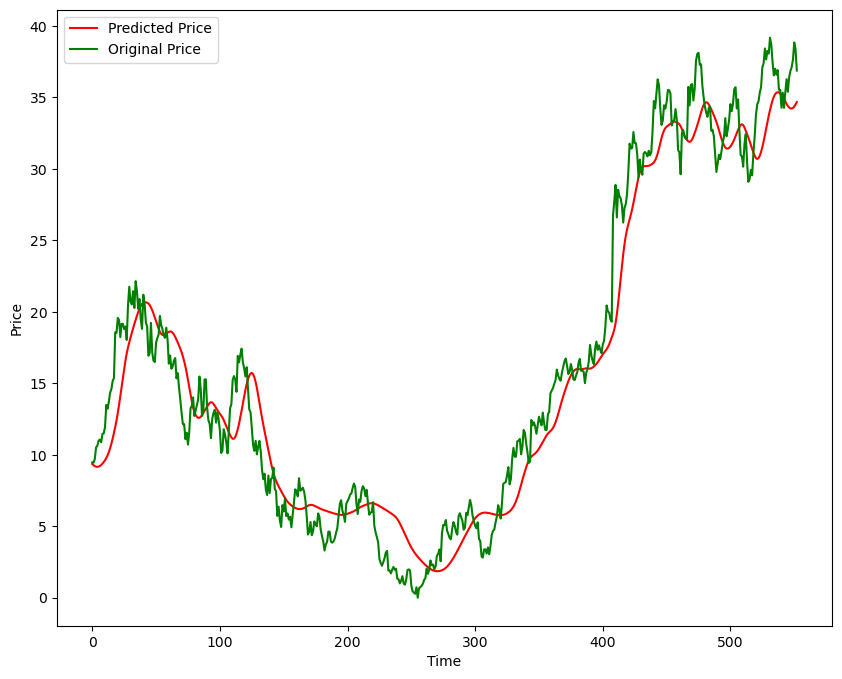

In [58]:
plt.figure(figsize=(10,8))
plt.plot(y_predict, 'r', label = 'Predicted Price')
plt.plot(y, 'g', label = 'Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()


In [59]:
model.save('Stock Predictions Model.keras')